In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve
import seaborn as sns
sns.set_theme(style="ticks", font_scale=2)
import os
import json
from datetime import datetime
import inspect
import os
import sys
import importlib
import matplotlib.gridspec as gridspec
import pandas as pd
from mpl_toolkits.axes_grid1 import make_axes_locatable


sys.path.append('../Classes')

# First, import the modules themselves
import sgh_class
import sgh_class2

import colorsys
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D


In [3]:
x = sgh_class2.SGH_class()

In [4]:
red = ['#fda2b7', '#d10333', '#6c011a']
blue = ['#71c8fc', '#0484d0', '#02456c']

p = np.linspace(10/180, 1000/180, 500)
c_values = [0.2, 0.9]

[Text(0.5, 0, 'Precipitation (mm/year)'),
 Text(0, 0.5, 'Biomass (kg/m$^2$)'),
 Text(0.5, 1.0, 'Infiltration Mechanism')]

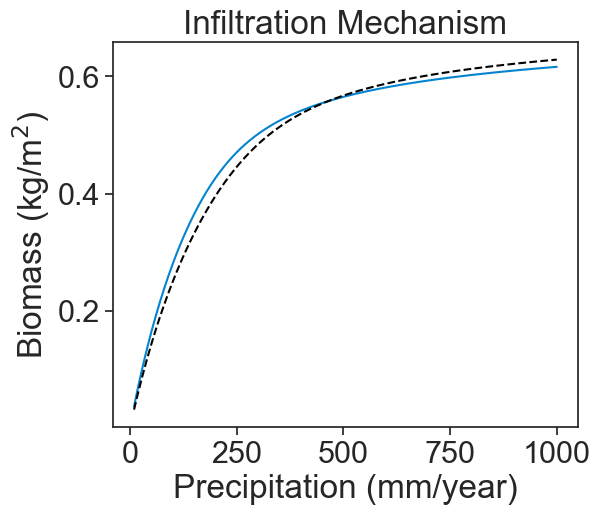

In [5]:
x.params.update(tree_root_active=0, shading_active=1, infiltration_active=1, infilt_i0=0.60, infilt_alpha=0.3)
# infilt_i0=0.60, infilt_alpha=0.30
sol0 = []; sol1 = [];
for precip in p:
    sol0.append(x.solutions_fsolve(p=precip, c=0))
    sol1.append(x.solutions_fsolve(p=precip, c=c_values[0]))
sol0 = np.array(sol0)
sol1 = np.array(sol1)

fig, ax = plt.subplots(1, 1, figsize=(6, 5))
ax.plot(p*180, sol1[:,0], color=blue[1], label=f'c={c_values[0]}')
ax.plot(p*180, sol0[:,0], color='black', label='c=0', ls='--')
ax.set(xlabel='Precipitation (mm/year)',
       ylabel='Biomass (kg/m$^2$)',
       title="Infiltration Mechanism")
# fig.savefig('infiltration_mechanism.png', dpi=300, bbox_inches='tight')
# fig.savefig('infiltration_mechanism.pdf')